# Rating Products

There are 4 ratings types:

* Average
* Time-Based Weighted Average
* User-Based Weighted Average
* Weighted Rating

**About dataset**

The dataset contains the ratings and user information for an online course. We will try to discover rating products with this dataset.

Variables: 

* Rating: Giving rate between 1-5 rank.
* Timestamp: The date score was given
* Enrolled: The date enrolled.
* Progress: Percentage of course completion.
* Questions Asked: Total number of questions asked.
* Questions Answered: Total number of questions answered.

**Import libraries**

In [102]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

**Read file**

In [6]:
df = pd.read_csv('datasets/course_reviews.csv')

In [7]:
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


## 1) Average rating

**Rating distributions**

In [13]:
df['Rating'].value_counts()

5.0    3267
4.5     475
4.0     383
3.5      96
3.0      62
1.0      15
2.0      12
2.5      11
1.5       2
Name: Rating, dtype: int64

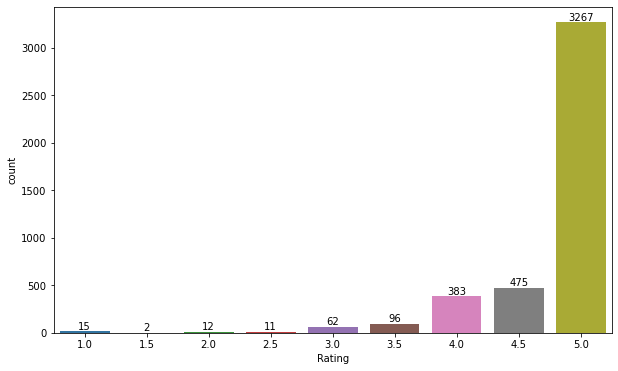

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rating', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [35]:
df.groupby('Questions Asked').agg({'Questions Asked': 'count',
                                  'Rating': 'mean'})

,Questions Asked,Rating
Questions Asked,,
0.0,3867,4.765193
1.0,276,4.740942
2.0,80,4.806250
3.0,43,4.744186
4.0,15,4.833333
5.0,13,4.653846
6.0,9,5.000000
7.0,2,4.750000
8.0,5,4.900000


**Average Rating**

In [36]:
df['Rating'].mean()

4.764284061993986

## 2) Time-Based Weighted Average

In [38]:
df.dtypes

Rating                float64
Timestamp              object
Enrolled               object
Progress              float64
Questions Asked       float64
Questions Answered    float64
dtype: object

**Convert timestamp objects to datetime**

In [40]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [45]:
df['Timestamp'].agg(['max', 'min'])

max   2021-02-05 07:45:55
min   2019-05-16 13:40:35
Name: Timestamp, dtype: datetime64[ns]

In [63]:
today_date = df['Timestamp'].max() + dt.timedelta(days=5)
today_date

Timestamp('2021-02-10 07:45:55')

**Add new column called 'days'**

In [64]:
df['days'] = (today_date - df['Timestamp']).dt.days

**Calculate the average mean with time-based**

In [70]:
df[df['days'] <= 30]['Rating'].mean()

4.775773195876289

In [74]:
df[(df['days'] > 30) & (df['days'] <= 90)]['Rating'].mean()

4.763833992094861

In [75]:
df[(df['days'] > 90) & (df['days'] <= 180)]['Rating'].mean()

4.752503576537912

In [78]:
df[df['days'] > 180]['Rating'].mean()

4.76641586867305

In [122]:
def time_based_weighted_average(dataframe, w1=28, w2=26, w3=24, w4=22):
    
    time_based_average = dataframe[dataframe['days'] <= 30]['Rating'].mean() * w1 + \
    dataframe[(dataframe['days'] > 30) & (dataframe['days'] <= 90)]['Rating'].mean() * w2 + \
    dataframe[(dataframe['days'] > 90) & (dataframe['days'] <= 180)]['Rating'].mean() * w3 + \
    dataframe[dataframe['days'] > 180]['Rating'].mean() * w4
    
    return time_based_average / 100

In [87]:
time_based_weighted_average(df, w1=28, w2=26, w3=22, w4=20)

4.765025682267194

In [89]:
time_based_weighted_average(df, w1=30, w2=28, w3=22, w4=20)

4.7654394371223985

## 3) User-Based Weighted Average

In [90]:
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,days
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0,5
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0,5
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0,5
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0,5
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0,5


In [109]:
df.groupby('Progress').agg({'Progress': 'count', 'Rating': 'mean'})

,Progress,Rating
Progress,,
0.0,69,4.673913
1.0,431,4.642691
2.0,84,4.654762
3.0,107,4.663551
4.0,247,4.777328
5.0,391,4.698210
6.0,49,4.755102
7.0,43,4.732558
8.0,62,4.741935


**Calculate the average mean with user-based (progress-based)**

In [112]:
df[df['Progress'] <= 10]['Rating'].mean()

4.700895713371721

In [113]:
df[(df['Progress'] > 10) & (df['Progress'] <= 45 )]['Rating'].mean()

4.787878787878788

In [114]:
df[(df['Progress'] > 45) & (df['Progress'] <= 75 )]['Rating'].mean()

4.823991031390134

In [116]:
df[df['Progress'] > 75]['Rating'].mean()

4.860491071428571

In [119]:
def user_based_weighted_average(dataframe, w1=22, w2=24, w3=26, w4=28):
    
    total_average = df[df['Progress'] <= 10]['Rating'].mean() * w1 + \
    df[(df['Progress'] > 10) & (df['Progress'] <= 45 )]['Rating'].mean() * w2 + \
    df[(df['Progress'] > 45) & (df['Progress'] <= 75 )]['Rating'].mean() * w3 + \
    df[df['Progress'] > 75]['Rating'].mean() * w4
    
    return total_average / 100

In [120]:
user_based_weighted_average(df)

4.800257704672543

In [121]:
user_based_weighted_average(df, w1=30, w2=28, w3=22, w4=20)

4.786698157370603

## 4) Weighted Rating

Time-based * (time_weight/100) + user-based * (user_weight/100)

In [123]:
def weighted_rating(dataframe, time_weight=50, user_weight=50):
    total_average = time_based_weighted_average(dataframe) * time_weight + user_based_weighted_average(dataframe) * user_weight
    return total_average / 100

In [124]:
weighted_rating(df)

4.782641693469869

In [125]:
weighted_rating(df, time_weight=35, user_weight=65)

4.787926496830671

In [126]:
weighted_rating(df, time_weight=40, user_weight=60)

4.786164895710403

In [127]:
weighted_rating(df, time_weight=60, user_weight=40)

4.779118491229334